Import required libraries

In [71]:
import pandas as pd
import os
from pylab import rcParams
%matplotlib inline

In [72]:
DATA = 'data' #https://data.world/brianray/enron-email-dataset

FILENAMES = [os.path.join(DATA, filename) for filename in os.listdir(DATA)]

In [73]:
FILENAMES

['data/enron_05_17_2015_with_labels_v2_100K_chunk_1_of_6.csv']

#### Import dataset

In [74]:
df = pd.read_csv(FILENAMES[0])

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [75]:
df.head()

,Unnamed: 0,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,...,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight,labeled
0,0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 23:39:00,frozenset({'phillip.allen@enron.com'}),frozenset({'tim.belden@enron.com'}),NaN,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 20:51:00,frozenset({'phillip.allen@enron.com'}),frozenset({'john.lavorato@enron.com'}),Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 10:00:00,frozenset({'phillip.allen@enron.com'}),frozenset({'leah.arsdall@enron.com'}),Re: test,Phillip K Allen,Leah Van Arsdall,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 13:13:00,frozenset({'phillip.allen@enron.com'}),frozenset({'randall.gay@enron.com'}),NaN,Phillip K Allen,Randall L Gay,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 12:07:00,frozenset({'phillip.allen@enron.com'}),frozenset({'greg.piper@enron.com'}),Re: Hello,Phillip K Allen,Greg Piper,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
Unnamed: 0        100000 non-null int64
Message-ID        100000 non-null object
Date              100000 non-null object
From              100000 non-null object
To                94999 non-null object
Subject           94636 non-null object
X-From            99994 non-null object
X-To              97400 non-null object
X-cc              21747 non-null object
X-bcc             34 non-null object
X-Folder          99994 non-null object
X-Origin          99994 non-null object
X-FileName        99271 non-null object
content           99598 non-null object
user              100000 non-null object
Cat_1_level_1     210 non-null float64
Cat_1_level_2     210 non-null float64
Cat_1_weight      210 non-null float64
Cat_2_level_1     200 non-null float64
Cat_2_level_2     200 non-null float64
Cat_2_weight      200 non-null float64
Cat_3_level_1     166 non-null float64
Cat_3_level_2   

In [77]:
df['Date'].min()

'1980-01-01 00:00:00'

In [78]:
df['Date'].max()

'2020-12-29 20:53:46'

In [79]:
df['Date'].unique()

array(['2001-05-14 23:39:00', '2001-05-04 20:51:00',
       '2000-10-18 10:00:00', ..., '1999-12-22 07:02:00',
       '1999-12-22 06:52:00', '1999-12-20 16:05:00'], dtype=object)

In [80]:
#determine howmany emails done in specic year and plot that data

In [81]:
df['Subject'].head()

0          NaN
1          Re:
2     Re: test
3          NaN
4    Re: Hello
Name: Subject, dtype: object

In [82]:
pd.isna(df['Subject']).head()

0     True
1    False
2    False
3     True
4    False
Name: Subject, dtype: bool

In [83]:
NanSubjectDF = df[pd.isna(df['Subject'])]
NanSubjectDF.shape

(5364, 52)

In [84]:
NotNanSubjectDF = df[pd.notna(df['Subject'])]
NotNanSubjectDF.shape

(94636, 52)

In [85]:
#Do we need to drop of 5364 data ? 

In [86]:
df['labeled'].describe()

count     100000
unique         2
top        False
freq       99790
Name: labeled, dtype: object

In [87]:
df[ df['labeled'] == True].shape

(210, 52)

In [88]:
#Why label ? What type of emails labelled ?

In [89]:
df[df['labeled']== True]['Subject'].head()

379         Re: Confidential Employee Information/Lenhart
381     RE: PERSONAL AND CONFIDENTIAL COMPENSATION INF...
2139    FW: Western Wholesale Activities - Gas & Power...
2140    FW: Western Wholesale Activities - Gas & Power...
2232    FW: Western Wholesale Activities - Gas & Power...
Name: Subject, dtype: object

In [90]:
df[df['labeled']== True]['content'].head()

379     I also need to know the base salaries of Jay R...
381     Thanks for the information. It would be helpfu...
2139    -----Original Message----- From: Hawkins, Bern...
2140    -----Original Message----- From: Perrino, Dave...
2232    -----Original Message----- From: Comnes, Alan ...
Name: content, dtype: object

In [91]:
df['user'].describe()

count         100000
unique            30
top       dasovich-j
freq           28234
Name: user, dtype: object

In [92]:
df['user'].unique()

array(['allen-p', 'arnold-j', 'arora-h', 'badeer-r', 'bailey-s', 'bass-e',
       'baughman-d', 'beck-s', 'benson-r', 'blair-l', 'brawner-s',
       'buy-r', 'campbell-l', 'carson-m', 'cash-m', 'causholli-m',
       'corman-s', 'crandell-s', 'cuilla-m', 'dasovich-j', 'davis-d',
       'dean-c', 'delainey-d', 'derrick-j', 'dickson-s', 'donoho-l',
       'donohoe-t', 'dorland-c', 'ermis-f', 'farmer-d'], dtype=object)

In [93]:
#plot the histogram of count of the emails sent from specific user like in describe we got 28K mails has user "dasovich-j"

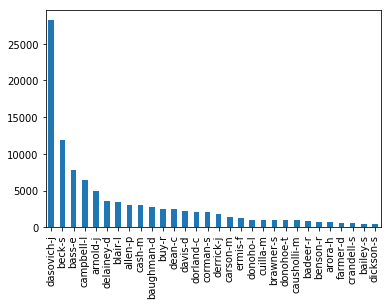

In [94]:
pd.value_counts(df['user']).plot.bar()